# <center> <font size = 40 color=orange> The Confusion Matrix Unveiled with the Pokemon Dataset</font></center>

The goal of this notebook is to complement a Medium post that explains how to use the Confusion Matrix to asses classification performance. In it, we will use the Pokemon dataset for a binary classification task where we want to asses if a Pokemon is legendary or not based on the rest of the features of the Complete Pokemon Dataset, found on Kaggle.
***
Link to the data: https://www.kaggle.com/rounakbanik/pokemon/data#

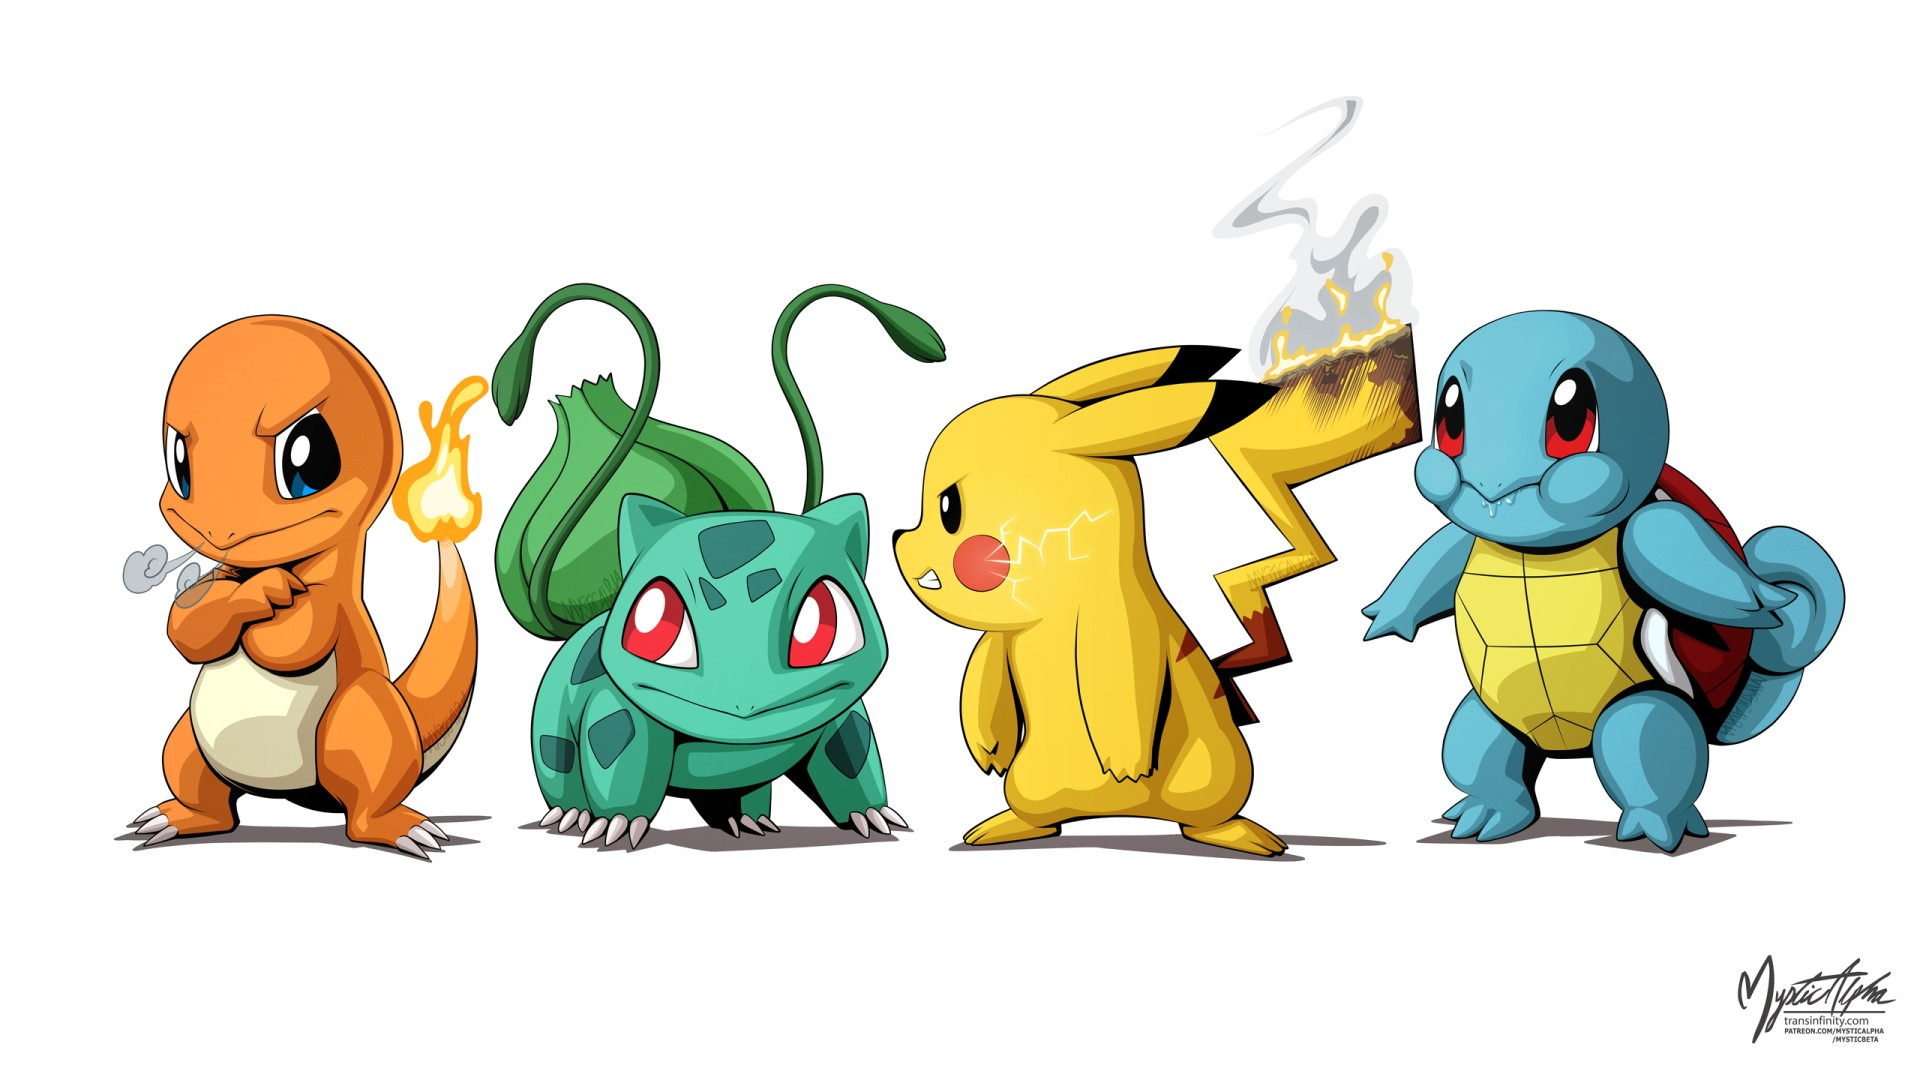

In [1]:
#First we make the neccesary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the csv into a pandas dataframe
df = pd.read_csv("pokemon/pokemon.csv")

## Exploratory data analysis and preparation

First of all, lets take a quick look at our data and perform some cleaning on it in order to leave it ready for the machine learning algorithms.

In [3]:
#Checking out our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

It looks like there are not too many non-numerical features, only abilities, capture_rate, classification, the types, and the names of course.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F8CF7E080>]],
      dtype=object)

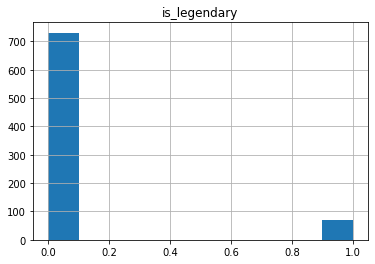

In [4]:
#Now we see how many of the Pokemons are legendary
df.hist('is_legendary')

In [5]:
# We have 70 legendary pokemons
df['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

In [6]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
#Lets take a look at the categorical features:
df['abilities'].head(10)

0    ['Overgrow', 'Chlorophyll']
1    ['Overgrow', 'Chlorophyll']
2    ['Overgrow', 'Chlorophyll']
3       ['Blaze', 'Solar Power']
4       ['Blaze', 'Solar Power']
5       ['Blaze', 'Solar Power']
6       ['Torrent', 'Rain Dish']
7       ['Torrent', 'Rain Dish']
8       ['Torrent', 'Rain Dish']
9    ['Shield Dust', 'Run Away']
Name: abilities, dtype: object

In [8]:
#This variable looks like an integer, but on paper is an object series
df['capture_rate'].head(10)

0     45
1     45
2     45
3     45
4     45
5     45
6     45
7     45
8     45
9    255
Name: capture_rate, dtype: object

In [9]:
#Lets keep exploring why: it looks like there is one data point that has two capture rates. Lets check it out
df['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
235                           7
150                           7
50                            7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
130                           2
220                           2
170                           2
80                            2
15                            2
30 (Meteorite)255 (Core)      1
205                           1
145                           1
155     

In [10]:
#Making an auxiliary dataframe to explore this datapoint
e = df[df['capture_rate'] == '30 (Meteorite)255 (Core)']

In [11]:
#Its the Pokemon Minior, at the index 773. What should we do with it? 
e['name']

773    Minior
Name: name, dtype: object

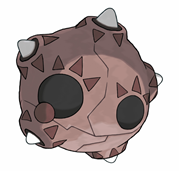

In [12]:
#Lets just keep one of these capture rates (30) and overwrite the one it comes with
df = df.set_value(773, 'capture_rate', 30) 

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [13]:
df.iloc[773]['capture_rate']

30

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [15]:
#Still, it seems like all the numbers are formated as strings, so we have to do a cast to convert them to integers
df.iloc[0]['capture_rate']

'45'

In [16]:
#Map the string variable to integer
df['capture_rate'] = df['capture_rate'].map(int)

In [17]:
df.iloc[0]['capture_rate']

45

In [18]:
#Okay, lets keep analyzing our other variables

In [19]:
#These look like the abilities or moves of each Pokemon
#We will drop this column for now, as it requieres a special treatment
df['abilities'].head()

0    ['Overgrow', 'Chlorophyll']
1    ['Overgrow', 'Chlorophyll']
2    ['Overgrow', 'Chlorophyll']
3       ['Blaze', 'Solar Power']
4       ['Blaze', 'Solar Power']
Name: abilities, dtype: object

In [20]:
df = df.drop('abilities', axis = 1)

In [21]:
#classfication  variable:
df['classfication'].value_counts()

Dragon Pokémon          8
Mouse Pokémon           6
Mushroom Pokémon        6
Balloon Pokémon         5
Fairy Pokémon           5
Flame Pokémon           5
Fox Pokémon             5
Bat Pokémon             4
Seed Pokémon            4
Drill Pokémon           4
Fruit Pokémon           4
Cocoon Pokémon          4
Poison Pin Pokémon      4
Tadpole Pokémon         4
Bagworm Pokémon         4
Land Spirit Pokémon     4
Scaly Pokémon           3
Mud Fish Pokémon        3
Volcano Pokémon         3
Big Jaw Pokémon         3
Shellfish Pokémon       3
Puppy Pokémon           3
Virtual Pokémon         3
Electric Pokémon        3
Iron Armor Pokémon      3
Superpower Pokémon      3
Mole Pokémon            3
Bivalve Pokémon         3
Flower Pokémon          3
Vibration Pokémon       3
                       ..
Wolf Pokémon            1
Whisper Pokémon         1
Sickle Grass Pokémon    1
Starshape Pokémon       1
Windveiled Pokémon      1
Young Fowl Pokémon      1
Long Nose Pokémon       1
Land Shark P

In [22]:
#We have 588 unique classfications, and to include this variable we would have to make 588 discintct dummy variables,
#So we will drop it for now too 
df['classfication'].nunique()

588

In [23]:
df = df.drop('classfication', axis = 1)

In [24]:
#Lastly, lets take a look at the types:
df['type1'].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [25]:
df['type2'].value_counts()

flying      95
ground      34
poison      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

In [26]:
#Making the dummies of these two variables, that have the same categories
type1_dummie = pd.get_dummies(df['type1'])
type2_dummie = pd.get_dummies(df['type2'])

In [27]:
#Filling in the variables
final_type_dummie = (type1_dummie) | (type2_dummie)

In [28]:
final_type_dummie.head()

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df = pd.concat([df,final_type_dummie], axis = 1)
df = df.drop(['type1', 'type2'], axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 55 columns):
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total         

In [31]:
pokemon_names = df['name']
df = df.drop(['name', 'japanese_name'], axis = 1)

In [32]:
#Lets check out the null values now: 
#We have them in the variables  weight_kg, height_m and percentage_male. We will fill them with the mean
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

Okay, we have finished clearing our dataframe, lets do some modelling!

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [138]:
Y = df['is_legendary']
X = df.drop(['is_legendary'], axis = 1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [36]:
print(y_train.value_counts())
print(np.mean(y_train))

0    515
1     45
Name: is_legendary, dtype: int64
0.08035714285714286


In [37]:
print(y_test.value_counts())
print(np.mean(y_test))

0    216
1     25
Name: is_legendary, dtype: int64
0.1037344398340249


In [130]:
#Lets use a Logistic Regression first
from sklearn.linear_model import LogisticRegression

In [131]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
preds = clf.predict(X_test)

# The Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix

In [140]:
labels = ['Legendary', 'Not Legendary']

In [142]:
confusion_matrix(y_test, preds)

array([[216,   0],
       [  2,  23]], dtype=int64)

In [143]:
#Getting the true positives, false positives, false negatives and true negatives and creating the matrix. 
#I do this so the rows are the predicted labels and the columns the real labels
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
cm = [[tp,fp],[fn,tn]]

In [144]:
import seaborn as sns

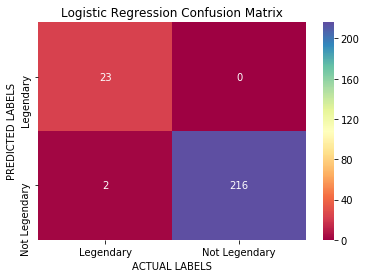

In [145]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Logistic Regression Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Legendary', 'Not Legendary']); ax.yaxis.set_ticklabels(['Legendary', 'Not Legendary']);

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
acc = accuracy_score(y_test, preds)
print("The accuracy of the model is {}".format(acc))

The accuracy of the model is 0.991701244813278


In [148]:
#Lets make a dataframe to check out the errors
predict_df = pd.DataFrame()

In [149]:
predict_df['real'] = y_test
predict_df['pred'] = preds

In [150]:
error = predict_df[(predict_df['real'] == 1) & (predict_df['pred'] == 0)]

In [151]:
error

,real,pred
787,1,0
784,1,0


In [152]:
#Both are legendary
print(df.iloc[787]['is_legendary'])
print(df.iloc[784]['is_legendary'])

1.0
1.0


In [117]:
#Our algorithm is predicting these two are not legendary, while really they are! 
print(pokemon_names.iloc[787])
print(pokemon_names.iloc[784])

Tapu Fini
Tapu Koko


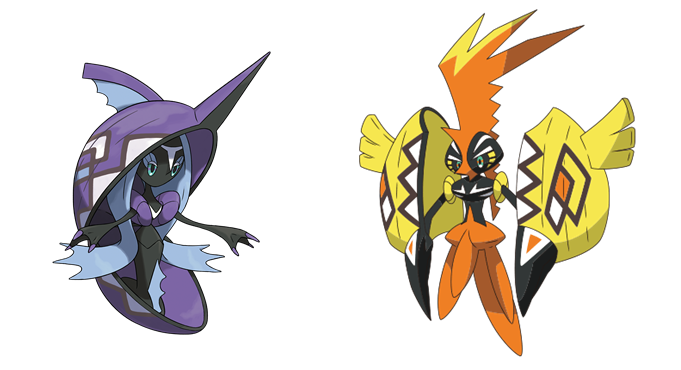

In [83]:
#Lets try a Random Forest now, to see if we can catch all the legendary Pokemons
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators = 300).fit(X_train, y_train)

In [85]:
preds = rf.predict(X_test)

In [86]:
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
cm = [[tp,fp],[fn,tn]]

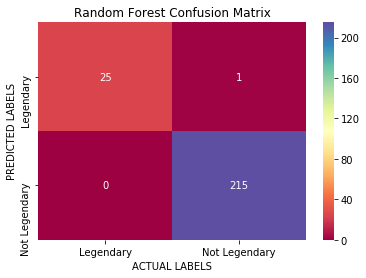

In [87]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Legendary', 'Not Legendary']); ax.yaxis.set_ticklabels(['Legendary', 'Not Legendary']);

In [88]:
cm_matrix = np.matrix(cm)

In [89]:
cm_matrix

matrix([[ 25,   1],
        [  0, 215]], dtype=int64)

In [90]:
#Lets make a dataframe to check out the error
predict_df = pd.DataFrame()

In [91]:
predict_df['real'] = y_test
predict_df['pred'] = preds

In [93]:
error = predict_df[(predict_df['real'] == 0) & (predict_df['pred'] == 1)]

In [94]:
error

,real,pred
375,0,1


In [97]:
df.iloc[375]['is_legendary']

0.0

In [153]:
#Our random forest is predicting Metagross as a legendary pokemon, while its not
pokemon_names.iloc[375]

'Metagross'

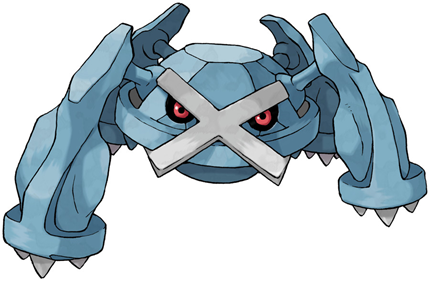

In [155]:
#Lets see the recall, precision, and F1 of our models:
logistic_preds = clf.predict(X_test)
random_fores_preds = rf.predict(X_test)

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [162]:
#Logistic regression
logistic_precision = precision_score(y_test,logistic_preds)
logistic_recall = recall_score(y_test,logistic_preds)
logistic_f1 = f1_score(y_test,logistic_preds)
print("LOGISTIC REGRESSION MODEL:")
print("Precision: {} ".format(logistic_precision))
print("Recall: {} ".format(logistic_recall))
print("Precision: {} ".format(logistic_f1))

LOGISTIC REGRESSION MODEL:
Precision: 1.0 
Recall: 0.92 
Precision: 0.9583333333333334 


In [164]:
#Random Forest
rf_precision = precision_score(y_test,random_fores_preds)
rf_recall = recall_score(y_test,random_fores_preds)
rf_f1 = f1_score(y_test,random_fores_preds)
print("RANDOM FOREST MODEL:")
print("Precision: {} ".format(rf_precision))
print("Recall: {} ".format(rf_recall))
print("Precision: {} ".format(rf_f1))

RANDOM FOREST MODEL:
Precision: 0.9615384615384616 
Recall: 1.0 
Precision: 0.9803921568627451 


# Conclusion

That is it, now we know how to use the Confusion Matrix to asses classification performance, and what the various metrics derived from it are. Stay tuned for further post on Classification assesment and have a good day! :)